In [18]:
# Import libraries for our task
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn import preprocessing

import dvc.api
import numpy as np
import pandas as pd
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

In [8]:
# Import system libraries and our Scripts

import os
import sys
import warnings
warnings.filterwarnings('ignore')
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from train_classifiers import TrainingClassifier

In [66]:
# Read AdSmart_AB_testing_data 

df  = pd.read_csv('../data/clean_data.csv')

In [67]:
# The types and shape of data features in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   1243 non-null   int64 
 1   auction_id   1243 non-null   object
 2   experiment   1243 non-null   object
 3   date         1243 non-null   object
 4   hour         1243 non-null   int64 
 5   device_make  1243 non-null   object
 6   platform_os  1243 non-null   int64 
 7   browser      1243 non-null   object
 8   aware        1243 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 87.5+ KB


In [43]:
def encode_labels(df):
    date_encoder = preprocessing.LabelEncoder()
    device_encoder = preprocessing.LabelEncoder()
    browser_encoder = preprocessing.LabelEncoder()
    experiment_encoder = preprocessing.LabelEncoder()
    aware_encoder = preprocessing.LabelEncoder()
    
    df['date'] = date_encoder.fit_transform(df['date'])
    df['device_make'] = device_encoder.fit_transform(df['device_make'])
    df['browser'] = browser_encoder.fit_transform(df['browser'])
    df['experiment'] = experiment_encoder.fit_transform(df['experiment'])
    df['browser'] = aware_encoder.fit_transform(df['browser'])
    df['aware'] = aware_encoder.fit_transform(df['aware'])
    
    return df 

### Task 2.2: ML modeling with MLOps


In [68]:
def feature_data(df):
    
    browser_feature_df = df[["experiment", "hour", "date", 'device_make', 'browser', 'aware']] 
    platform_feature_df = df[["experiment", "hour", "date", 'device_make', 'platform_os', 'aware']] 

    return browser_feature_df, platform_feature_df

In [69]:
def save_encoded_df(df):
    
    broweser_df, platfrom_df = feature_data(df)
    broweser_df.save_csv("../Data/browser_featured_data.csv")
    platfrom_df.save_csv(platfrom_df, "../data/platform_featured_data.csv") 

In [70]:
#Split data by browser and platform_os, and version each split
df = encode_labels(cleaned_data)
cleaned_browser_df, cleaned_platform_df = feature_data(df)

In [71]:
cleaned_browser_df.head()

,experiment,hour,date,device_make,browser,aware
0,1,2,2,4,2,0
1,1,16,1,13,1,1
2,1,8,3,13,1,0
3,0,4,5,43,4,1
4,0,15,0,13,1,0


In [72]:
# splitting data
X = cleaned_browser_df.loc[:, cleaned_browser_df.columns != Y_col].columns
y = 'aware'


X_train,X_test,y_train,y_test=train_test_split(cleaned_browser_df[X], cleaned_browser_df[y],\
                                                test_size=0.1, random_state=42)

### Training Browser Featured Data


In [51]:
##Training with Logistic Regression

In [73]:
LR = TrainingClassifier(X_train, X_test,  y_train, y_test, "logistic_regression")

clf2, loss_arr_2, acc_arr_2 = LR.train(5)

step 0: Validation Accuracy of Logistic Regression Classifier is: 0.545
step 0: Validation Loss of Logistic Regression Classifier is: 0.675

step 1: Validation Accuracy of Logistic Regression Classifier is: 0.527
step 1: Validation Loss of Logistic Regression Classifier is: 0.688

step 2: Validation Accuracy of Logistic Regression Classifier is: 0.554
step 2: Validation Loss of Logistic Regression Classifier is: 0.668

step 3: Validation Accuracy of Logistic Regression Classifier is: 0.543
step 3: Validation Loss of Logistic Regression Classifier is: 0.676

step 4: Validation Accuracy of Logistic Regression Classifier is: 0.574
step 4: Validation Loss of Logistic Regression Classifier is: 0.653



step 1: Test Accuracy of Logistic Regression Classifier is: 0.552
Test Metrics
              precision    recall  f1-score   support

           0       0.89      0.54      0.67       107
           1       0.18      0.61      0.28        18

    accuracy                           0.55       125
   macro avg       0.54      0.58      0.48       125
weighted avg       0.79      0.55      0.62       125



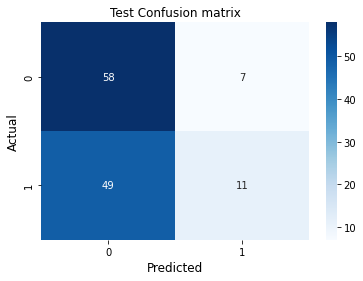

In [74]:
test_acc2, test_loss2, report2, matrix2  = LR.test()

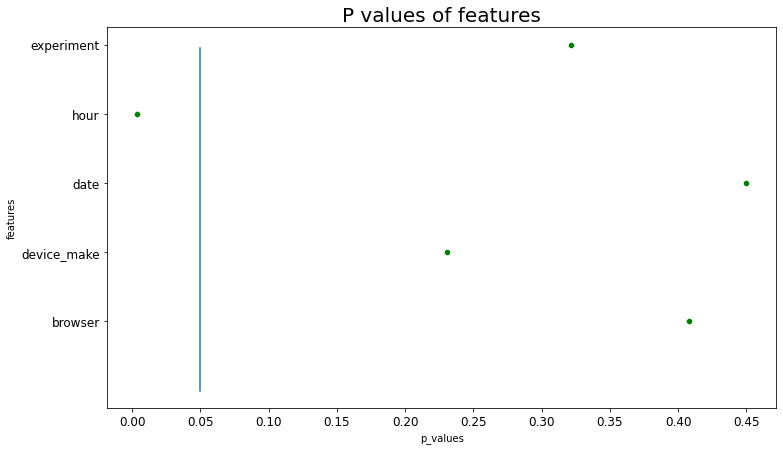

,features,p_values
0,experiment,0.321315
1,hour,0.003776
2,date,0.449766
3,device_make,0.230609
4,browser,0.408101


In [75]:
# based on logistic regression
p_values_df = LR.get_p_values()
LR.plot_pvalues(p_values_df)
p_values_df

The P-value for experiment is 0.3. It is not that much significant, since our significance level is 0.05. Hour is the most important predictor for the Logestic Regression Model with p value 0.001, it is then follwed by device_make then experiment. The least predictor for the Logestic Regression Model is date

In [83]:
#Training with RandomForest
RF = TrainingClassifier(X_train, X_test,  y_train, y_test, "random_forest")

clf2, loss_arr_2, acc_arr_2 = RF.train(5)

step 0: Validation Accuracy of Random Forest Classifier is: 0.540
step 0: Validation Loss of Random Forest Classifier is: 0.678

step 1: Validation Accuracy of Random Forest Classifier is: 0.531
step 1: Validation Loss of Random Forest Classifier is: 0.685

step 2: Validation Accuracy of Random Forest Classifier is: 0.536
step 2: Validation Loss of Random Forest Classifier is: 0.681

step 3: Validation Accuracy of Random Forest Classifier is: 0.480
step 3: Validation Loss of Random Forest Classifier is: 0.721

step 4: Validation Accuracy of Random Forest Classifier is: 0.578
step 4: Validation Loss of Random Forest Classifier is: 0.649



step 1: Test Accuracy of Random Forest Classifier is: 0.504
Test Metrics
              precision    recall  f1-score   support

           0       0.63      0.52      0.57        79
           1       0.37      0.48      0.42        46

    accuracy                           0.50       125
   macro avg       0.50      0.50      0.49       125
weighted avg       0.53      0.50      0.51       125

Loss on test data is: 0.704



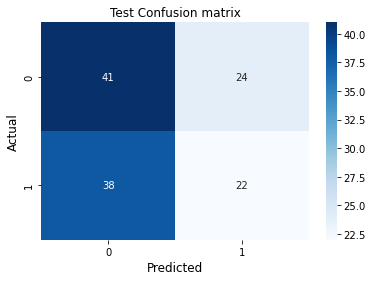

In [84]:
test_acc, loss, report, confusion_matrix = RF.test()
print(f"Loss on test data is: {loss:.3f}")
print()

In [85]:
RF.get_feature_importance()

,feature,feature_importances
0,experiment,0.053350
1,hour,0.380625
2,date,0.207642
3,device_make,0.277869
4,browser,0.080515


In [86]:
# XGBoost
XG = TrainingClassifier(X_train, X_test,  y_train, y_test, "xgboost")
clf, acc_arr, loss_arr = XG.train(5)

step 0: Validation Accuracy of XGBoost Classifier is: 0.554
step 0: Validation Loss of XGBoost Classifier is: 0.668

step 1: Validation Accuracy of XGBoost Classifier is: 0.558
step 1: Validation Loss of XGBoost Classifier is: 0.665

step 2: Validation Accuracy of XGBoost Classifier is: 0.580
step 2: Validation Loss of XGBoost Classifier is: 0.648

step 3: Validation Accuracy of XGBoost Classifier is: 0.480
step 3: Validation Loss of XGBoost Classifier is: 0.721

step 4: Validation Accuracy of XGBoost Classifier is: 0.583
step 4: Validation Loss of XGBoost Classifier is: 0.646



step 1: Test Accuracy of XGBoost Classifier is: 0.504
Test Metrics
              precision    recall  f1-score   support

           0       0.66      0.52      0.58        83
           1       0.33      0.48      0.39        42

    accuracy                           0.50       125
   macro avg       0.50      0.50      0.49       125
weighted avg       0.55      0.50      0.52       125

Loss on test data is: 0.704



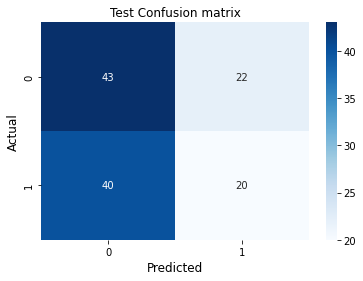

In [87]:
test_acc, loss, report, confusion_matrix = XG.test()
print(f"Loss on test data is: {loss:.3f}")
print()

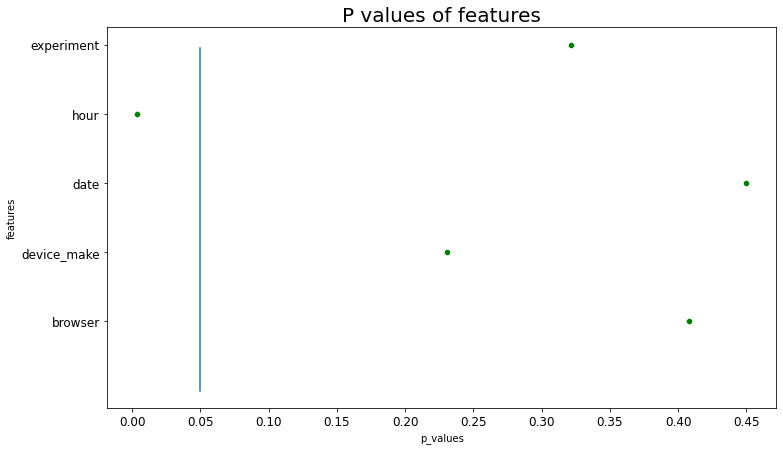

,features,p_values
0,experiment,0.321315
1,hour,0.003776
2,date,0.449766
3,device_make,0.230609
4,browser,0.408101


In [88]:
XG.plot_pvalues(p_values_df)
p_values_df

# conculsusion 
Based on the above experment features selection based on their important are depends on the model

## parameters Tunning 

In [92]:
xgb_params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]
}

In [96]:
df.head(2)

,Unnamed: 0,experiment,date,hour,device_make,platform_os,browser,aware
0,2,1,2,2,4,6,2,0
1,16,1,1,16,13,6,1,1


In [93]:
from sklearn.model_selection import RandomizedSearchCV

In [99]:
from xgboost import XGBClassifier
clf_xgb =XGBClassifier(objective='binary:logistic',seed=42)
random_search=RandomizedSearchCV(clf_xgb,param_distributions=xgb_params,scoring="accuracy",cv=10,verbose=10)
#X=['experiment','date','hour','device_make','platform_os','browser','Unnamed:0']
#y=['aware']
random_search.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10; 1/10] START colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1
[CV 1/10; 1/10] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1;, score=0.527 total time=   0.1s
[CV 2/10; 1/10] START colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1
[CV 2/10; 1/10] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1;, score=0.545 total time=   0.1s
[CV 3/10; 1/10] START colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1
[CV 3/10; 1/10] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1;, score=0.464 total time=   0.0s
[CV 4/10; 1/10] START colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1
[CV 4/10; 1/10] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=

[CV 4/10; 4/10] START colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=5, min_child_weight=5
[CV 4/10; 4/10] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=5, min_child_weight=5;, score=0.571 total time=   0.1s
[CV 5/10; 4/10] START colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=5, min_child_weight=5
[CV 5/10; 4/10] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=5, min_child_weight=5;, score=0.580 total time=   0.1s
[CV 6/10; 4/10] START colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=5, min_child_weight=5
[CV 6/10; 4/10] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=5, min_child_weight=5;, score=0.554 total time=   0.1s
[CV 7/10; 4/10] START colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=5, min_child_weight=5
[CV 7/10; 4/10] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=5, min_child_weight=5;, score=0.536 total time=   0.1s
[CV 8/10; 4/10] STAR

[CV 7/10; 7/10] START colsample_bytree=0.7, gamma=0.4, learning_rate=0.15, max_depth=4, min_child_weight=7
[CV 7/10; 7/10] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.15, max_depth=4, min_child_weight=7;, score=0.491 total time=   0.1s
[CV 8/10; 7/10] START colsample_bytree=0.7, gamma=0.4, learning_rate=0.15, max_depth=4, min_child_weight=7
[CV 8/10; 7/10] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.15, max_depth=4, min_child_weight=7;, score=0.580 total time=   0.1s
[CV 9/10; 7/10] START colsample_bytree=0.7, gamma=0.4, learning_rate=0.15, max_depth=4, min_child_weight=7
[CV 9/10; 7/10] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.15, max_depth=4, min_child_weight=7;, score=0.550 total time=   0.1s
[CV 10/10; 7/10] START colsample_bytree=0.7, gamma=0.4, learning_rate=0.15, max_depth=4, min_child_weight=7
[CV 10/10; 7/10] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.15, max_depth=4, min_child_weight=7;, score=0.559 total time=   0.1s
[CV 1/10; 8/10] ST

[CV 10/10; 10/10] START colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=7
[CV 10/10; 10/10] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=7;, score=0.541 total time=   0.1s


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=

In [100]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [101]:
from xgboost import XGBClassifier
final_xgb=XGBClassifier(objective='binary:logistic',seed=42,colsample_bytree=0.3, gamma=0.0,learning_rate=0.05,max_depth=15,min_child_weight=1)

In [102]:
final_xgb.fit(X_train,y_train,
        eval_set=[(X_train,y_train)],
        eval_metric=['logloss','auc'],
        early_stopping_rounds=10,
        verbose=True)

[0]	validation_0-logloss:0.69279	validation_0-auc:0.50828
[1]	validation_0-logloss:0.69124	validation_0-auc:0.58696
[2]	validation_0-logloss:0.69095	validation_0-auc:0.58877
[3]	validation_0-logloss:0.68956	validation_0-auc:0.58702
[4]	validation_0-logloss:0.68908	validation_0-auc:0.59051
[5]	validation_0-logloss:0.68643	validation_0-auc:0.65471
[6]	validation_0-logloss:0.68602	validation_0-auc:0.65123
[7]	validation_0-logloss:0.68482	validation_0-auc:0.64429
[8]	validation_0-logloss:0.68241	validation_0-auc:0.66325
[9]	validation_0-logloss:0.68134	validation_0-auc:0.65748
[10]	validation_0-logloss:0.68120	validation_0-auc:0.65718
[11]	validation_0-logloss:0.67899	validation_0-auc:0.66521
[12]	validation_0-logloss:0.67870	validation_0-auc:0.66498
[13]	validation_0-logloss:0.67857	validation_0-auc:0.66455
[14]	validation_0-logloss:0.67846	validation_0-auc:0.66457
[15]	validation_0-logloss:0.67754	validation_0-auc:0.66115
[16]	validation_0-logloss:0.67744	validation_0-auc:0.66158
[17]	va

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [103]:
pre=final_xgb.predict(X_test)

In [104]:
pre

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0])

In [105]:
from sklearn.metrics import accuracy_score
res=accuracy_score(y_test, pre)


In [106]:
res

0.576

In [111]:
X_train.head() 

,experiment,hour,date,device_make,browser
1131,1,9,3,73,2
363,1,1,0,13,1
947,0,15,0,13,1
932,1,8,0,60,2
858,0,15,0,69,4


In [112]:
y_train

1131    0
363     1
947     1
932     1
858     0
       ..
1044    1
1095    0
1130    0
860     1
1126    1
Name: aware, Length: 1118, dtype: int64